<div style="width: 50%; float: left">
    <img src="../../../../ups.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>NRO. PRUEBA: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">PRUEBA PRÁCTICA</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Prueba Práctica Unidad 1
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Generar gráficas para entender y procesar los datos:

- Gráficas y reportes del total de personas vacunadas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv')
FMT = '%d/%m/%Y'
date = df['fecha']
df['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("29/12/2020", FMT)).days)
df

fecha  dosis_total  primera_dosis  segunda_dosis  fecha_no
0   21/01/2021            0              0              0        23
1   22/01/2021          108            108              0        24
2   27/01/2021         2982           2982              0        29
3   04/02/2021         6228           6228              0        37
4   17/02/2021         8190           6228           1962        50
5   24/02/2021        24492          20784           3708        57
6   01/03/2021        42114          35886           6228        62
7   04/03/2021        59316          53088           6228        65
8   05/03/2021        71148          64920           6228        66
9   08/03/2021        74472          68244           6228        69
10  09/03/2021        75258          69030           6228        70
11  11/03/2021        95915          89687           6228        72
12  12/03/2021       123176         116948           6228        73
13  13/03/2021       139359         119222          20137        74
14  15/03/2021       141191         121054          20137        76
15  21/03/2021       178970         140765          38205        82
16  23/03/2021       182261         143614          38647        84
17  24/03/2021       191179         152526          38653        85
18  26/03/2021       230770         172413          58357        87
19  27/03/2021       235000         174642          60358        88
20  29/03/2021       244866         182329          62537        90
21  01/04/2021       283106         204902          78204        93
22  04/04/2021       301069         211720          89349        96
23  05/04/2021       335093         228504         106589        97
24  06/04/2021       356783         244159         112624        98
25  08/04/2021       363255         250631         112624       100
26  14/04/2021       480962         338180         142782       106
27  15/04/2021       485132         338180         146952       107
28  16/04/2021       514151         354019         160132       108
29  17/04/2021       545132         377199         167933       109
30  18/04/2021       554369         384093         170276       110
31  19/04/2021       577711         401871         175840       111
32  20/04/2021       601229         421937         179292       112
33  21/04/2021       643702         457403         186299       113
34  22/04/2021       675510         486524         188986       114
35  23/04/2021       711204         514854         196350       115
36  24/04/2021       732717         532367         200350       116
37  25/04/2021       743937         541420         202517       117
38  26/04/2021       765489         555265         210224       118
39  27/04/2021       816175         595699         220476       119
40  28/04/2021       861393         633421         227972       120
41  29/04/2021       920865         691000         229865       121
42  30/04/2021       987452         748021         239431       122
43  01/05/2021      1036794         791822         244972       123
44  02/05/2021      1067472         821960         245512       124
45  04/05/2021      1141262         889218         252044       126
46  05/05/2021      1182085         924539         257546       127
47  06/05/2021      1215676         953238         262438       128
48  07/05/2021      1245822         981620         264202       129
49  09/05/2021      1289962        1024121         265841       131

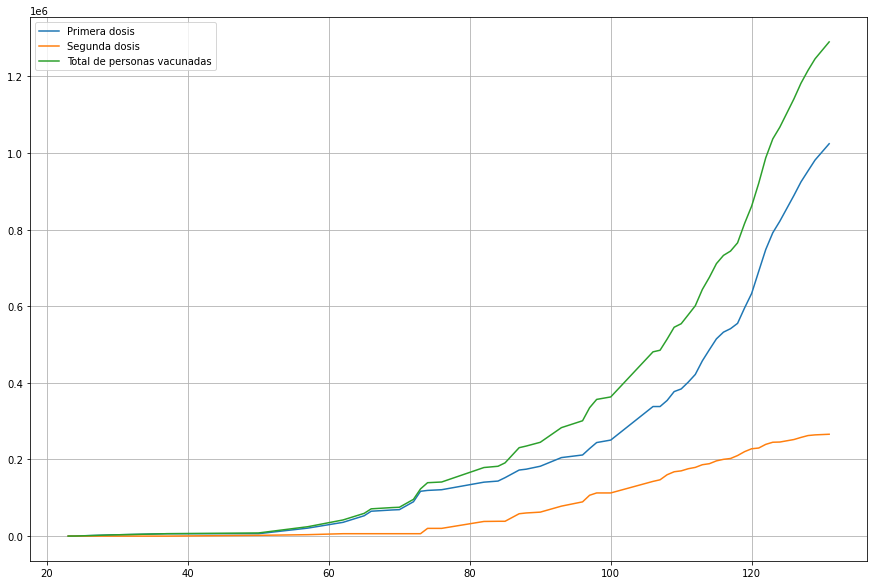

In [3]:
plt.figure(figsize=(15,10))
plt.grid(True)

plt.plot(df['fecha_no'], df['primera_dosis'], label='Primera dosis')
plt.plot(df['fecha_no'], df['segunda_dosis'], label='Segunda dosis')
plt.plot(df['fecha_no'], df['dosis_total'], label='Total de personas vacunadas')

plt.legend(loc='upper left')
plt.show()

- Gráfico de pie por fabricante de la vacuna

In [4]:
df_fab = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv')
df_fab

vaccine   total  arrived_at
0      Pfizer/BioNTech    8190  20/01/2021
1      Pfizer/BioNTech   16380  17/02/2021
2      Pfizer/BioNTech   17550  24/02/2021
3      Pfizer/BioNTech   31590  03/03/2021
4              Sinovac   20000  06/03/2021
5      Pfizer/BioNTech   73710  10/03/2021
6   Oxford/AstraZeneca   84000  17/03/2021
7      Pfizer/BioNTech   62010  17/03/2021
8      Pfizer/BioNTech   65520  24/03/2021
9      Pfizer/BioNTech   66690  31/03/2021
10     Pfizer/BioNTech   53820  05/04/2021
11             Sinovac  300000  07/04/2021
12             Sinovac  700000  10/04/2021
13     Pfizer/BioNTech   53820  14/04/2021
14     Pfizer/BioNTech   54990  21/04/2021
15  Oxford/AstraZeneca  336000  24/04/2021
16     Pfizer/BioNTech   54990  28/04/2021
17     Pfizer/BioNTech  100620  04/05/2021

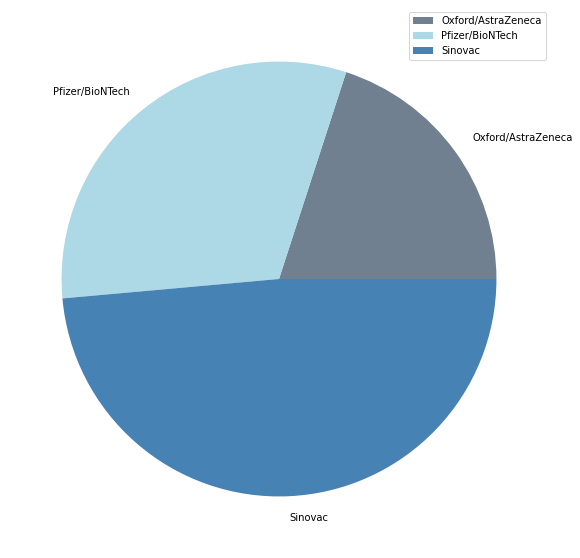

In [5]:
df_pie = df_fab.groupby(['vaccine']).sum()
df_pie.index
colors = ['slategray', 'lightblue', 'steelblue']
plt.figure(figsize=(10,10))

plt.pie(df_pie['total'], labels=df_pie.index, startangle = 0, colors=colors)
plt.legend()
plt.show()

- Histograma de vacunas por mes de llegada y fabricante

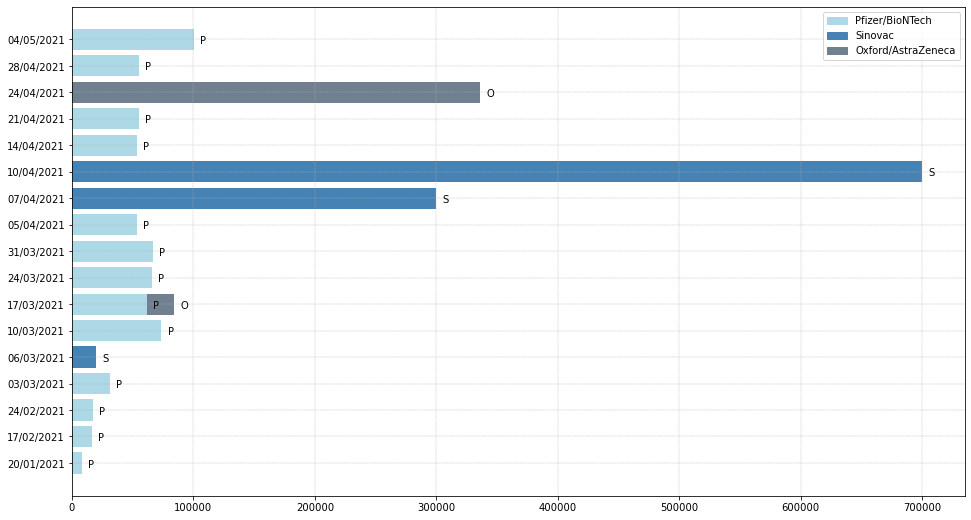

In [6]:
fig, ax = plt.subplots(figsize =(16, 9))
colors = ['lightblue' if i == 'Pfizer/BioNTech' else 'steelblue' if i == 'Sinovac' else 'slategray' for i in df_fab['vaccine'] ]

ax.barh(df_fab['arrived_at'], df_fab['total'], color=colors)
plt.grid(linestyle='--', linewidth=0.4)

for i, el in enumerate(ax.patches):
    plt.text(el.get_width() + 5000, el.get_y() + 0.25, str(df_fab['vaccine'][i])[0] )

l = mpatches.Patch(color='lightblue', label='Pfizer/BioNTech')
s = mpatches.Patch(color='steelblue', label='Sinovac')
a = mpatches.Patch(color='slategray', label='Oxford/AstraZeneca')
plt.legend(handles=[l, s, a])
plt.show()

In [7]:
df_h = df_fab
df_h['month'] = [i[3:5] for i in df_h['arrived_at']]
df_h = df_h.drop(['arrived_at'], axis=1)
dfh = df_h.groupby(['month', 'vaccine']).sum()
df_h

vaccine   total month
0      Pfizer/BioNTech    8190    01
1      Pfizer/BioNTech   16380    02
2      Pfizer/BioNTech   17550    02
3      Pfizer/BioNTech   31590    03
4              Sinovac   20000    03
5      Pfizer/BioNTech   73710    03
6   Oxford/AstraZeneca   84000    03
7      Pfizer/BioNTech   62010    03
8      Pfizer/BioNTech   65520    03
9      Pfizer/BioNTech   66690    03
10     Pfizer/BioNTech   53820    04
11             Sinovac  300000    04
12             Sinovac  700000    04
13     Pfizer/BioNTech   53820    04
14     Pfizer/BioNTech   54990    04
15  Oxford/AstraZeneca  336000    04
16     Pfizer/BioNTech   54990    04
17     Pfizer/BioNTech  100620    05

In [8]:
mes = ['Enero' if i[0] == '01' else 'Febrero'if i[0] == '02' else 'Marzo' if i[0] == '03' else 'Abril' if i[0] == '04' else 'Mayo' for i in dfh.index]
fab = [i[1] for i in dfh.index]

dfh['mes'] = mes
dfh['fab'] = fab
dfh = dfh.sort_values(by=['total'], ascending=False)
dfh.reset_index(drop=True, inplace=True)

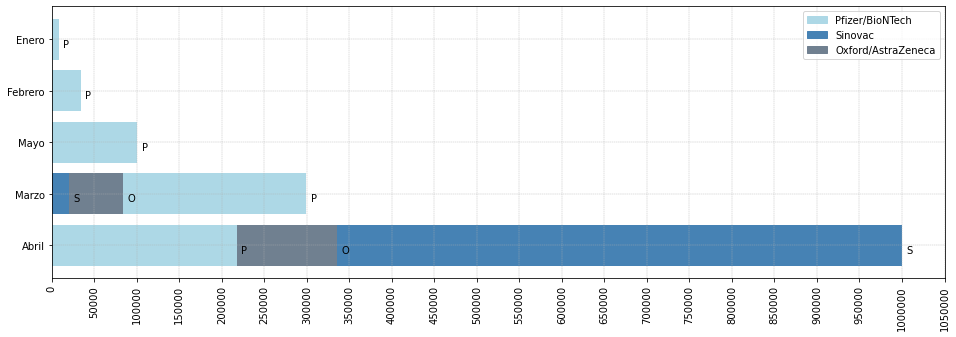

In [9]:
fig, ax = plt.subplots(figsize =(16, 5))
colors = ['lightblue' if i == 'Pfizer/BioNTech' else 'steelblue' if i == 'Sinovac' else 'slategray' for i in dfh['fab'] ]

ax.barh(dfh['mes'], dfh['total'], color=colors)
plt.grid(linestyle='--', linewidth=0.4)

for i, el in enumerate(ax.patches):
    plt.text(el.get_width() + 5000, el.get_y() + 0.25, str(dfh['fab'][i])[0] )

l = mpatches.Patch(color='lightblue', label='Pfizer/BioNTech')
s = mpatches.Patch(color='steelblue', label='Sinovac')
a = mpatches.Patch(color='slategray', label='Oxford/AstraZeneca')
plt.xticks(np.arange(0, 1100000, step=50000), rotation=90)
plt.legend(handles=[l, s, a])
try:
    plt.ticklabel_format(style='plain')
except AttributeError:
    print('')
plt.show()

- Generar un reporte parametrizado

Ingrese fecha inicial: 01/01/2021
Ingrese fecha final: 01/05/2021

Primera dosis:  791822
Segunda dosis:  244972
Total dosis:  1036794
Número de vacunas:  1999260


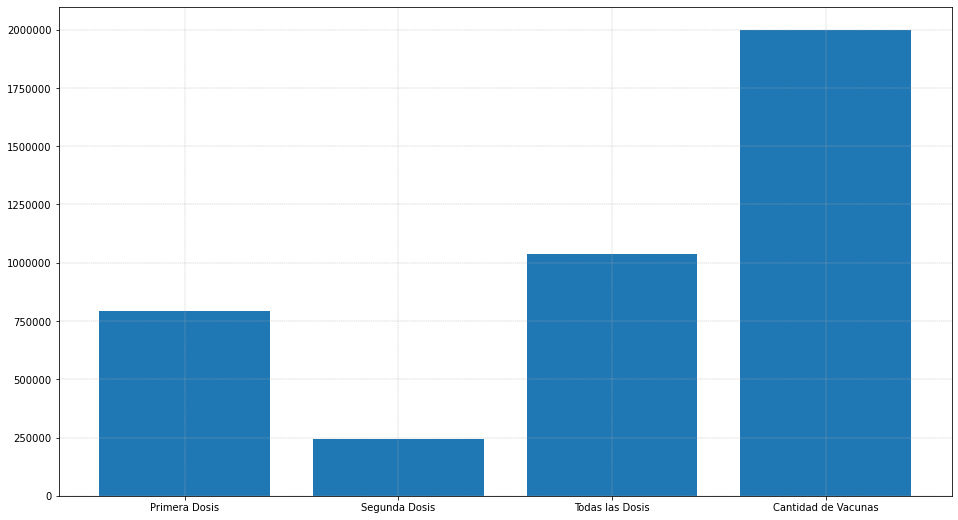

In [10]:
f1, f2 = input('Ingrese fecha inicial: '), input('Ingrese fecha final: ')
f1 = datetime.strptime(f1, '%d/%m/%Y')
f2 = datetime.strptime(f2, '%d/%m/%Y')


i1 = 0
i2 = df.index.stop-1
dosis1 = 0
dosis2 = 0
dosisT = 0
vacunas = 0 

for i, row in df.iterrows():
    f = row['fecha']
    f = datetime.strptime(f, '%d/%m/%Y')
    if f1 >= f:
        i1 = i-1
    if f2 < f:
        i2 = i-1
        break
print('')        
if i1 == -1:
    dosis1 = df['primera_dosis'][i2]
    dosis2 = df['segunda_dosis'][i2]
    dosisT = df['dosis_total'][i2]
    
else:
    dosis1 = df['primera_dosis'][i2] - df['primera_dosis'][i1]
    dosis2 = df['segunda_dosis'][i2] - df['segunda_dosis'][i1]
    dosisT = df['dosis_total'][i2] - df['dosis_total'][i1]
     
for i, row in df_fab.iterrows():
    f = row['arrived_at']
    f = datetime.strptime(f, '%d/%m/%Y')
    if f >= f1 and f < f2:
        vacunas += row['total']

print('Primera dosis: ', dosis1)
print('Segunda dosis: ', dosis2)
print('Total dosis: ', dosisT)
print('Número de vacunas: ', vacunas)

fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(['Primera Dosis', 'Segunda Dosis', 'Todas las Dosis', 'Cantidad de Vacunas'], [dosis1, dosis2, dosisT, vacunas])
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.grid(linestyle='--', linewidth=0.4)
plt.show()

- Generar un modelo matemático de predicción basado en regresión, del proceso de vacunación en base al número actual de vacunados y a la llegada de nuevas vacunas.

In [11]:
df_vac = df_fab
FMT = '%d/%m/%Y'
date = df_vac['arrived_at']
df_vac['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("29/12/2020", FMT)).days)

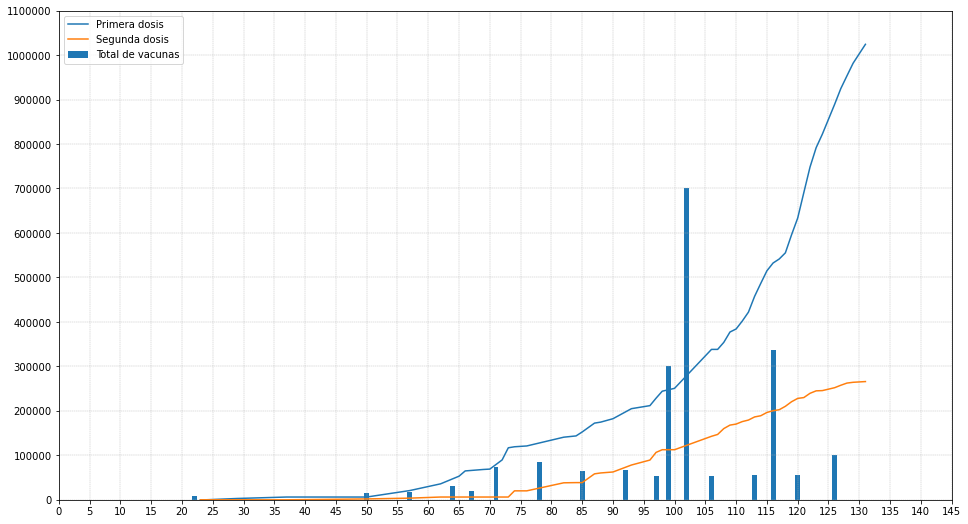

In [12]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.plot(df['fecha_no'], df['primera_dosis'], label='Primera dosis')
plt.plot(df['fecha_no'], df['segunda_dosis'], label='Segunda dosis')
plt.bar(df_vac['fecha_no'], df_vac['total'], label='Total de vacunas')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.grid(linestyle='--', linewidth=0.4)
plt.xticks(np.arange(0, 150, step=5))
plt.yticks(np.arange(0, 1200000, step=100000))
plt.legend(loc='upper left')
plt.show()

In [13]:
xtrainP, xtestP, ytrainP, ytestP = tts(df['fecha_no'], df['primera_dosis'], test_size=0.2)
xtrainS, xtestS, ytrainS, ytestS = tts(df['fecha_no'], df['segunda_dosis'], test_size=0.2)
xtrainV, xtestV, ytrainV, ytestV = tts(df_vac['fecha_no'], df_vac['total'], test_size=0.2)

In [14]:
model = LinearRegression()
model.fit(np.array(xtrainP).reshape(-1, 1), ytrainP)
p = np.poly1d(np.polyfit(xtrainP, ytrainP, 4))

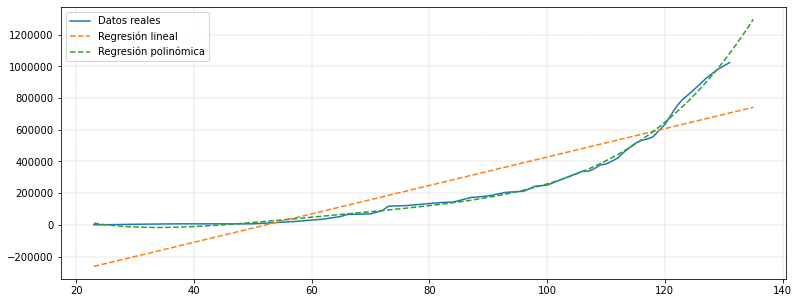

In [15]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(linestyle='--', linewidth=0.4)

plt.plot(df['fecha_no'], df['primera_dosis'], '-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.show()

In [16]:
model = LinearRegression()
model.fit(np.array(xtrainS).reshape(-1, 1), ytrainS)
p = np.poly1d(np.polyfit(xtrainS, ytrainS, 4))

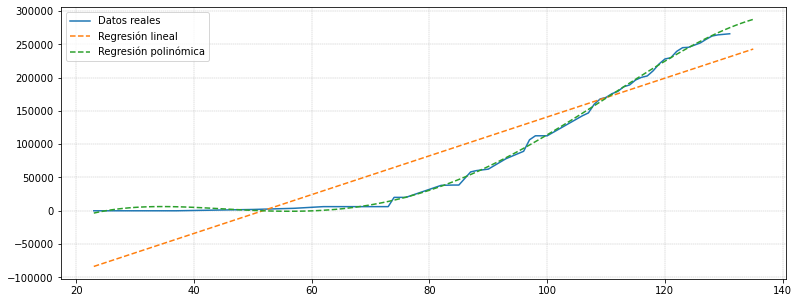

In [17]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(linestyle='--', linewidth=0.4)

plt.plot(df['fecha_no'], df['segunda_dosis'], '-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()

In [18]:
model = LinearRegression()
model.fit(np.array(xtrainV).reshape(-1, 1), ytrainV)
p = np.poly1d(np.polyfit(xtrainV, ytrainV, 4))

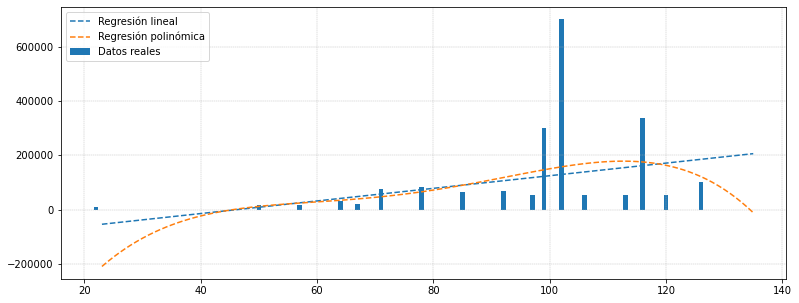

In [19]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(linestyle='--', linewidth=0.4)

plt.bar(df_vac['fecha_no'], df_vac['total'], label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()

- Desarrollar y generar un proceso de comparación con al menos dos países (1. Latinoamérica,  1. Europa).

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df

location iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
17907     Zimbabwe      ZWE  2021-05-07            640762.0   
17908     Zimbabwe      ZWE  2021-05-08            657838.0   
17909     Zimbabwe      ZWE  2021-05-09            684243.0   
17910     Zimbabwe      ZWE  2021-05-10            690653.0   
17911     Zimbabwe      ZWE  2021-05-11            709772.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   
...                  ...                      ...                     ...   
17907           500422.0                 140340.0                 33407.0   
17908           509274.0                 148564.0                 17076.0   
17909           526066.0                 158177.0                 26405.0   
17910           529360.0                 161293.0                  6410.0   
17911           539526.0                 170246.0                 19119.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                            0.00   
1                  1367.0                             NaN   
2                  1367.0                             NaN   
3                  1367.0                             NaN   
4                  1367.0                             NaN   
...                   ...                             ...   
17907             20060.0                            4.31   
17908             19648.0                            4.43   
17909             22863.0                            4.60   
17910             21877.0                            4.65   
17911             21428.0                            4.78   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                               0.00                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
17907                           3.37                                 0.94   
17908                           3.43                                 1.00   
17909                           3.54                                 1.06   
17910                           3.56                                 1.09   
17911                           3.63                                 1.15   

       daily_vaccinations_per_million  
0                                 NaN  
1                                35.0  
2                                35.0  
3                                35.0  
4                                35.0  
...                               ...  
17907                          1350.0  
17908                          1322.0  
17909                          1538.0  
17910                          1472.0  
17911                          1442.0  

[17912 rows x 12 columns]

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv').loc[:, ['location', 'date', 'people_fully_vaccinated']]
df.dropna(inplace=True)
FMT = '%Y-%m-%d'
date = df['date']
df['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-12-29", FMT)).days)
dfL = df[df['location']=='Argentina']
dfE = df[df['location']=='Spain']
df = df[df['location']=='Ecuador']

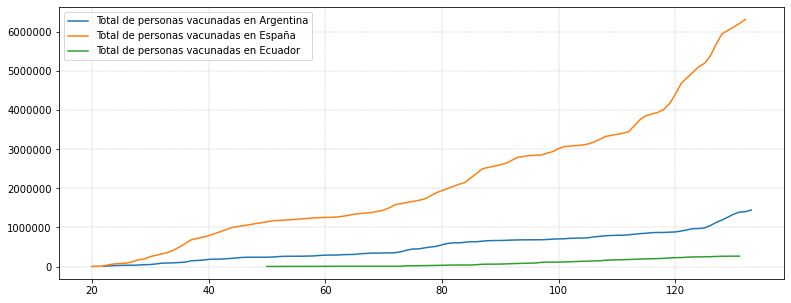

In [45]:
plt.figure(figsize=(13,5))
plt.plot(dfL['fecha_no'], dfL['people_fully_vaccinated'], label='Total de personas vacunadas en Argentina')
plt.plot(dfE['fecha_no'], dfE['people_fully_vaccinated'], label='Total de personas vacunadas en España')
plt.plot(df['fecha_no'], df['people_fully_vaccinated'], label='Total de personas vacunadas en Ecuador')
plt.legend(loc='upper left')
plt.grid(linestyle='--', linewidth=0.4)
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.show()

- Generar las gráficas de regresión y comparar

In [65]:
xtrainL, xtestL, ytrainL, ytestL = tts(dfL['fecha_no'], dfL['people_fully_vaccinated'], test_size=0.2)
xtrainE, xtestE, ytrainE, ytestE = tts(dfE['fecha_no'], dfE['people_fully_vaccinated'], test_size=0.2)
xtrain, xtest, ytrain, ytest = tts(df['fecha_no'], df['people_fully_vaccinated'], test_size=0.2)

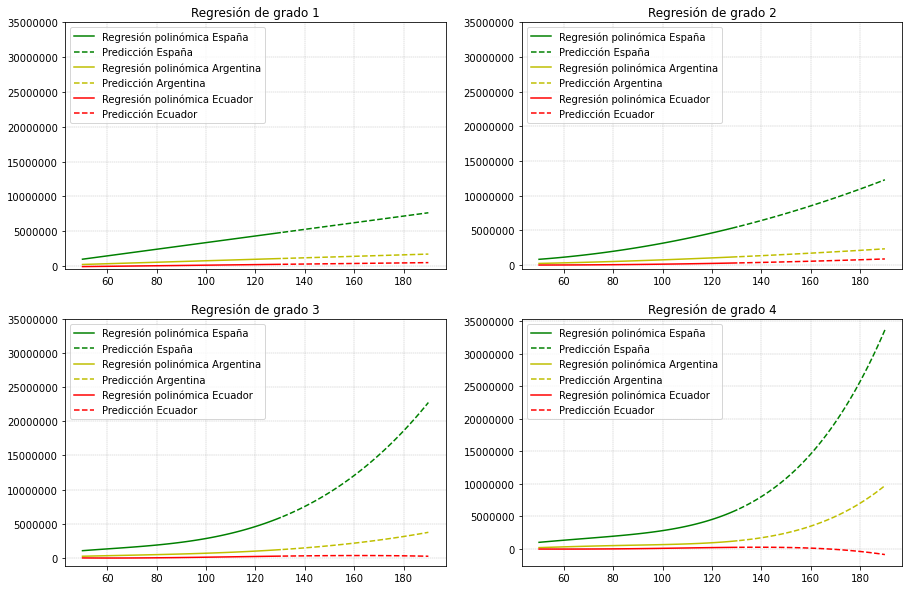

In [58]:
grado = 1

fig, axs = plt.subplots(2, 2,figsize=(15,10))
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])))
pred_x2 = list(range(max(df['fecha_no']),max(df['fecha_no'])+60))

for grado in range(4):
    p = np.poly1d(np.polyfit(xtrainE, ytrainE, grado+1))
    Ppred_y = p(pred_x)
    axs[int(grado/2),grado%2].plot(pred_x, Ppred_y, 'g-', label='Regresión polinómica España')
    Ppred_y = p(pred_x2)
    axs[int(grado/2),grado%2].plot(pred_x2, Ppred_y, 'g--', label='Predicción España')
    
    p = np.poly1d(np.polyfit(xtrainL, ytrainL, grado+1))
    Ppred_y = p(pred_x)
    axs[int(grado/2),grado%2].plot(pred_x, Ppred_y, 'y-', label='Regresión polinómica Argentina')
    Ppred_y = p(pred_x2)
    axs[int(grado/2),grado%2].plot(pred_x2, Ppred_y, 'y--', label='Predicción Argentina')

    p = np.poly1d(np.polyfit(xtrain, ytrain, grado+1))
    Ppred_y = p(pred_x)
    axs[int(grado/2),grado%2].plot(pred_x, Ppred_y, 'r-', label='Regresión polinómica Ecuador')
    Ppred_y = p(pred_x2)
    axs[int(grado/2),grado%2].plot(pred_x2, Ppred_y, 'r--', label='Predicción Ecuador')

    axs[int(grado/2),grado%2].legend(loc='upper left')
    axs[int(grado/2),grado%2].grid(linestyle='--', linewidth=0.4)
    axs[int(grado/2),grado%2].set_title("Regresión de grado " + str(grado+1))
    axs[int(grado/2),grado%2].set_yticks(np.arange(0, 40000000, step=5000000))
    try:
        axs[int(grado/2),grado%2].ticklabel_format(axis='y', style='plain')
    except AttributeError:
        print('')
plt.show()

In [81]:
no_ecuatorianos = 17370000

dias1 = 0
dias2 = 0
dias3 = 0
dias4 = 0

dia = 0

while (dias1==0 or dias2==0 or dias3==0 or dias4==0) and dia <= 5000:
    p = np.poly1d(np.polyfit(xtrain, ytrain, 1))
    if p(dia) >= no_ecuatorianos and dias1==0:
        dias1 = dia
    p = np.poly1d(np.polyfit(xtrain, ytrain, 2))
    if p(dia) >= no_ecuatorianos and dias2==0:
        dias2 = dia
    dia+=1
    
print('Número de días - regresión grado 1: ', dias1)
print('Número de días - regresión grado 2: ', dias2)

Número de días - regresión grado 1:  4308
Número de días - regresión grado 2:  717


In [90]:
date1 = datetime.strptime("12/29/2020", "%m/%d/%Y") + timedelta(days=dias1)
date2 = datetime.strptime("12/29/2020", "%m/%d/%Y") + timedelta(days=dias2)
print('Población totalmente vacunada (Regresión grado 1): ', date1)
print('Población totalmente vacunada (Regresión grado 2): ', date2)

Población totalmente vacunada (Regresión grado 1):  2032-10-15 00:00:00
Población totalmente vacunada (Regresión grado 2):  2022-12-16 00:00:00


### Opinión

De acuerdo con los datos presentados en este estudio, se logra apreciar cómo el Ecuador, en comparación con otros países en Latinoamérica o Europa, presenta un avance en el sistema de vacunación muy deficiente. Es por ello que en las predicciones realizadas para determinar el día en que toda la población será totalmente vacunada es, en el mejor de los casos, en diciembre del próximo año. 

### Conclusiones

Los modelos con regresiones polinómicas realizan mejores predicciones ya que se ajustan de mejor manera a los datos reales. Sin embargo, al aumentar el grado de la regresión polinómica podemos caer en un overfitting que nos arrojará resultados erróneos como en las predicciones realizadas con los datos de Ecuador para determinar la fecha en el que toda la población será vacunada. En ese caso, los modelos de grado 3 y 4 indican que el la cantidad de personas totalmente vacunadas tendrán valores negativos, por lo que sus resultados fueron despreciados al momento de presentar la fecha aproximada en el que toda la población será totalmente vacunada.  

### Recomendaciones

Se recomienda realizar un estudio futuro para analizar el impacto de la llegada de más vacunas al país en la cantidad de personas vacunadas totalmente.